### Distribution Analysis

Distribution analysis is a key step in data exploration, helping you understand how data points are spread across a range of values.

**Visual Inspection**
- **Histograms**: Create histograms to see the frequency of different values. Look for patterns like skewness, modality, and outliers.
- **Box Plots**: Use box plots to visualize the median, quartiles, and outliers. This helps identify the spread and central tendency of the data.
- **KDE Plots**: Kernel Density Estimation plots provide a smoothed representation of the probability density function. They can reveal the shape and peaks of the distribution.

**Statistical Measures**
- **Mean and Median**: Calculate the mean (average) and median (middle value) to understand the central tendency.
- **Standard Deviation and Variance**: Measure the spread of the data. A high standard deviation indicates a wider spread.
- **Skewness**: Determine the skewness of the distribution. A positive skew means the tail on the right side is longer, while a negative skew means the tail on the left side is longer.
- **Kurtosis**: Measure the "tailedness" of the distribution. A high kurtosis indicates a heavy-tailed distribution with more extreme values.

**Common Distributions**

- **Normal Distribution (Gaussian)**: Symmetrical bell-shaped curve.
- **Uniform Distribution**: All values have equal probability.
- **Poisson Distribution**: Commonly used for count data (e.g., number of occurrences in a fixed interval).
- **Binomial Distribution**: Represents the number of successes in a fixed number of Bernoulli trials.
- **Exponential Distribution**: Often used for modeling waiting times or interarrival times.
- **Log-normal Distribution**: Useful for modeling variables that are log-normally distributed.


*Features to analyze*

- Fwd IAT Total 
- Bwd IAT Total
- Fwd Header Length 
- Bwd Header Length
- Down/up Ratio 
- Average Packet Size 
- Fwd Bytes/Bulk avg 
- Fwd Packet/Bulk avg 
- Total TCP Flow time
---

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [2]:
# Functions

def read_data(data_path: str, usecols: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=usecols)
    return data


def sturges_rule(data: pd.DataFrame) -> int:
    """
    This function calculates the number of bins for a histogram
    """
    n = len(data)
    k = 1 + 3.322 * np.log10(n)
    return int(k) # 


def freedman_dioconis_rule(data: pd.DataFrame) -> int:
    """
    This function calculates the number of bins for a histogram
    """
    n = len(data)
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr / np.cbrt(n)
    k = (data.max() - data.min()) / h
    return int(k)
    

def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")


def hist_plot(feature: str, bins: int, save: bool = True, 
                fig_size: tuple = (8, 6), density: bool = True, hist_color: str = '#a9bec3'):
    """
    This function plots the histogram for the given feature
    Also saves the plot as well
    """
    plt.figure(figsize=fig_size)

    # Hist func
    plt.hist(to_log(data[feature]), bins=bins, color = hist_color, density=density)

    plt.xlabel(f'Log of {feature}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} (Logarithmic Scale)')

    # Save plot
    if save:
        folder_name = 'histogram_plots'
        file_name = f'{feature.strip()}_hist.png'   
        save_plot(folder_name, file_name)

    plt.show()


def to_log(data: pd.DataFrame): 
    """
    This function takes the log of the data
    """
    return np.log10(data + 1) 


**Data**

In [6]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Fwd IAT Total', 'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length',
                    'Down/Up Ratio', 'Average Packet Size', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Total TCP Flow Time']

# Read the data
try:
    data = read_data(file_path, usecols = columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 9 features


**Analysis**

---

Before we begin, its important to choose the right bin size for histogram. 

1. **To choose bin size, we ll utilize two rules:**
- Sturges' rule: 
    - Number of bins (k) = 1 + log2(n)
- Freedman-Diaconis rule: Takes in account data and interquartile range (IQR)
    - bin_width = 2 * IQR * n^(-1/3)
    - number_of_bins = (max(data) - min(data)) / bin_width

2. **Since these features have wide range of values ranging from 0 to millions. We will use log scaling to plot histogram**

In [10]:
# n unique
data.nunique()

Fwd IAT Total          614738
Bwd IAT Total          455963
Fwd Header Length       18193
Bwd Header Length       21811
Down/Up Ratio           89549
Average Packet Size    467620
Fwd Bytes/Bulk Avg     107333
Fwd Packet/Bulk Avg       618
Total TCP Flow Time    629615
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Fwd IAT Total        float64
 1   Bwd IAT Total        float64
 2   Fwd Header Length    int64  
 3   Bwd Header Length    int64  
 4   Down/Up Ratio        float64
 5   Average Packet Size  float64
 6   Fwd Bytes/Bulk Avg   int64  
 7   Fwd Packet/Bulk Avg  int64  
 8   Total TCP Flow Time  int64  
dtypes: float64(4), int64(5)
memory usage: 221.9 MB


Fig saved successfully!


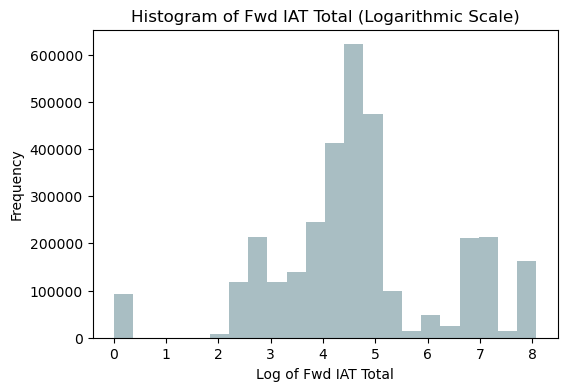

In [24]:
hist_plot('Fwd IAT Total', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Majority of the flows have short inter-arrival times: Distribution is highly right skewed 

> Outliers: Some flows have exceptionally high inter-arrival time whereas some have exceptionally low inter-arrival time 

> Clustering around 4-5 indicate pattern around this data points

Fig saved successfully!


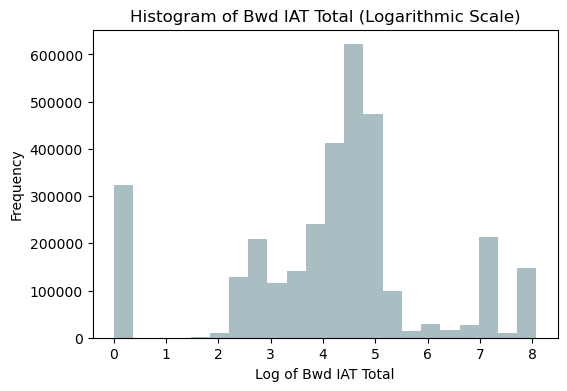

In [25]:
hist_plot('Bwd IAT Total', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> majority of the flows have shorter backward inter-arrival time
 
> Some flows have exceptionally higher and some have exceptionally lower backward inter-arrival time

Fig saved successfully!


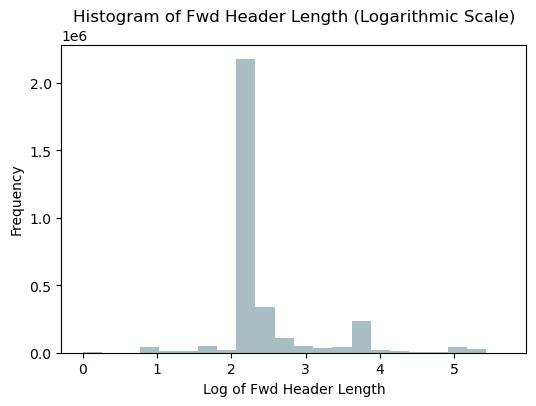

In [26]:
hist_plot('Fwd Header Length', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Majority of flows have short Forward header length 

> Few outliers with higher header length

Fig saved successfully!


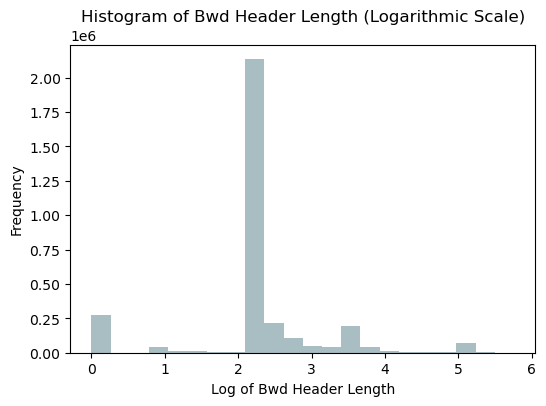

In [27]:
hist_plot('Bwd Header Length', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Similar insights as Fwd header length 

> But, there are some flows with lower header length unlike in Fwd header length

Error in saving the figure


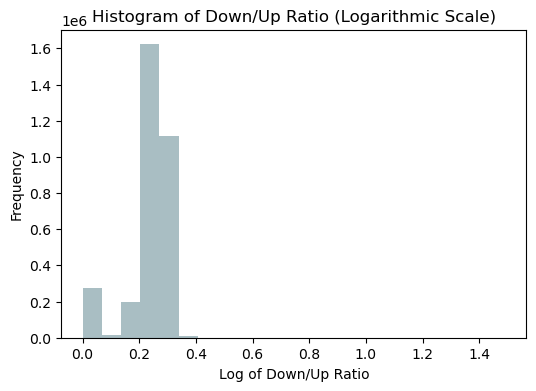

In [28]:
hist_plot('Down/Up Ratio', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Majority of flows have low Down/Up ratio

> Few values with higher Down/Up ratio 

Fig saved successfully!


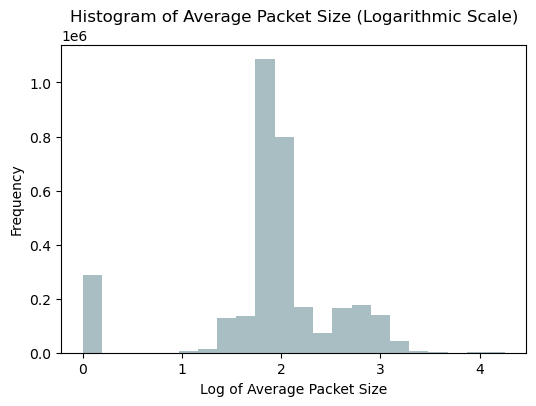

In [29]:
hist_plot('Average Packet Size', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Majority of flows have small average packet sizes: Most of the network connections have relatively small average packet sizes.

> There are a few connections with exceptionally large average packet sizes, which might be worth investigating further.

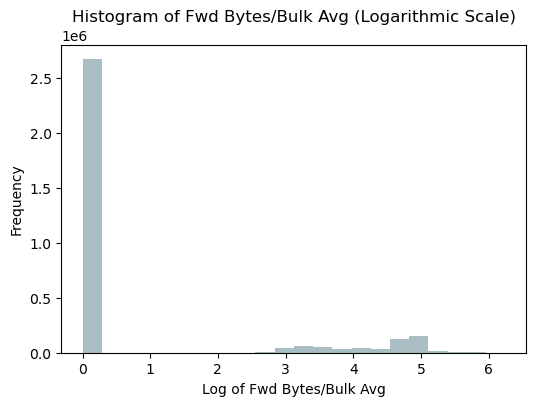

In [43]:
plt.figure(figsize = (6, 4))
plt.hist(to_log(data['Fwd Bytes/Bulk Avg']), bins=22, color = '#a9bec3', density=False)
plt.xlabel('Log of Fwd Bytes/Bulk Avg') 
plt.ylabel('Frequency') 
plt.title('Histogram of Fwd Bytes/Bulk Avg (Logarithmic Scale)')
if plt.savefig('histogram_plots/FwdBytesBulkAvg_hist.png'): 
    print("Fig saved successfully!")
plt.show()

> Majority of flows have low average bytes per bulk: Most of the network connections have relatively low average bytes per bulk.

> There are a few connections with exceptionally high average bytes per bulk, which might be worth investigating further.

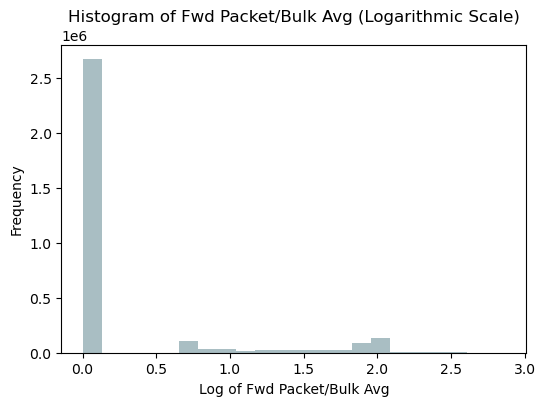

In [44]:
plt.figure(figsize = (6, 4))
plt.hist(to_log(data['Fwd Packet/Bulk Avg']), bins=22, color = '#a9bec3', density=False)
plt.xlabel('Log of Fwd Packet/Bulk Avg') 
plt.ylabel('Frequency') 
plt.title('Histogram of Fwd Packet/Bulk Avg (Logarithmic Scale)')
if plt.savefig('histogram_plots/FwdPacketBulkAvg_hist.png'): 
    print("Fig saved successfully!")
plt.show()

> Similar insights as above

Fig saved successfully!


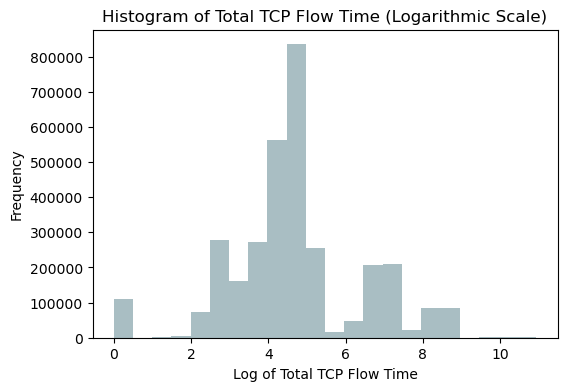

In [32]:
hist_plot('Total TCP Flow Time', bins=sturges_rule(data), fig_size=(6,4), density=False, save=True)

> Majority of flows have short durations: Most of the network connections have relatively short total TCP flow times.

> Presence of outliers: There are a few connections with exceptionally long flow times, which might be worth investigating further.

> Clustering: The clustering around the 4-5 range suggests that there might be a common pattern or characteristic among these connections.